# Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/raw/owid-covid-data.csv')


In [2]:
# Drop all rows where date is not equal to 01.10.2020
data.drop(data[data['date'] != "2020-10-01"].index, inplace = True)

### Rows to consider dropping: 
- World
- International

In [3]:
# Drop rows
data.drop(data[data['location'] == "World"].index, inplace = True) 
data.drop(data[data['location'] == "International"].index, inplace = True)

### Columns to consider dropping: 
- aged_65_older
- continent
- date
- *iso_code*
- *location*
- new_cases
- new_cases_smoothed
- new_cases_smoothed_per_millionnew_deaths_per_million
- new_deaths
- new_deaths_smoothed_per_million
- new_deaths_smoothednew_cases_per_million
- new_tests
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- tests_units
- total_cases
- total_deaths
- total_tests
- tests_per_case
- positive_rage

In [4]:
# Drop columns except location
data.drop(['aged_65_older', 'continent', 'date', 'new_cases', 'new_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths', 'new_deaths_per_million', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'total_cases', 'total_deaths', 'total_tests', 'tests_per_case', 'positive_rate'], axis=1, inplace=True)

# Save locations and clean data for later refrence
data['location'].to_csv('../data/raw/locations.csv', index=False)
data.to_csv('../data/clean/clean.csv', index=False)

# Drop location
data.drop(['location', 'iso_code'], axis=1, inplace=True)

In [5]:
data.shape

(210, 18)

### Impute our data to remove any NaN

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)

IterativeImputer(random_state=0)

In [7]:
imputed_df = imp_mean.transform(data)
data = pd.DataFrame(imputed_df, columns=data.columns)

### Scale data

array([[<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'total_tests_per_thousand'}>,
        <AxesSubplot:title={'center':'stringency_index'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'median_age'}>],
       [<AxesSubplot:title={'center':'aged_70_older'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>,
        <AxesSubplot:title={'center':'extreme_poverty'}>,
        <AxesSubplot:title={'center':'cardiovasc_death_rate'}>,
        <AxesSubplot:title={'center':'diabetes_prevalence'}>,
        <AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'male_smokers'}>],
       [<AxesSubplot:title={'center':'handwashing_facilities'}>,
        <AxesSubplot:title={'center':'hospital_beds_per_thousand'}>,
        <AxesSubplot:title={'

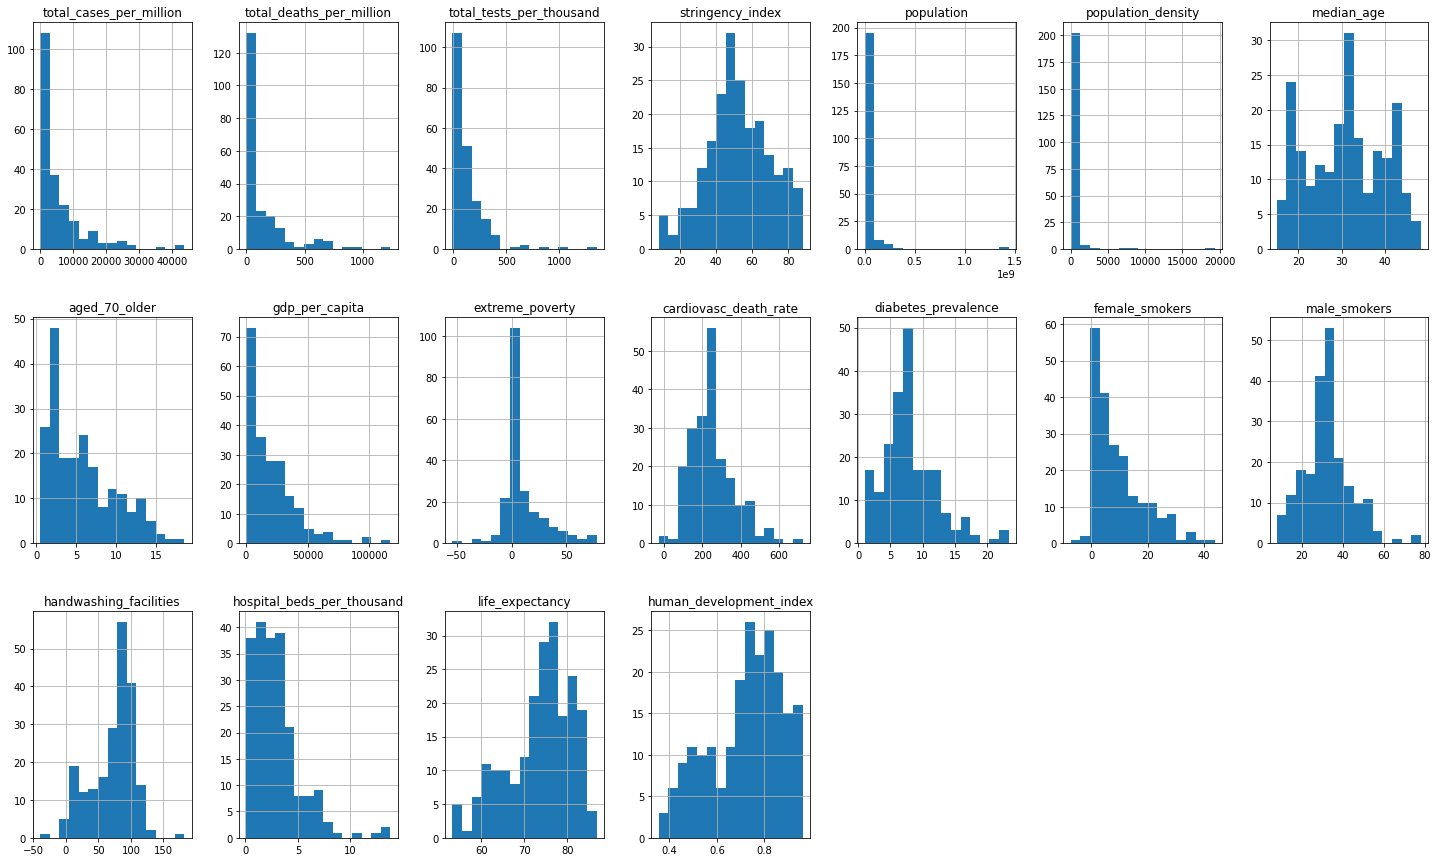

In [8]:
categorical = np.array(data.columns)
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7))

In [9]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [10]:
data.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.128069,0.107631,0.099525,0.554210,0.025666,0.018688,0.477526,0.290175,0.169852,0.486196,0.370154,0.316152,0.329292,0.351504,0.502780,0.208402,0.605199,0.606831
std,0.172166,0.159247,0.122622,0.221889,0.099011,0.079362,0.262235,0.223567,0.168437,0.144111,0.151451,0.182020,0.179205,0.160923,0.152149,0.164878,0.224255,0.247802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.012253,0.020338,0.424829,0.000716,0.002145,0.249245,0.091181,0.040770,0.411892,0.266769,0.201833,0.187337,0.261008,0.407475,0.093796,0.485285,0.419706
50%,0.063615,0.042019,0.062562,0.534974,0.004800,0.005013,0.490473,0.236489,0.127674,0.436207,0.357832,0.283415,0.267944,0.343122,0.553692,0.182482,0.650433,0.659147
75%,0.176337,0.145594,0.132965,0.709280,0.018174,0.012963,0.696375,0.451480,0.240655,0.525894,0.445479,0.406348,0.415573,0.427557,0.607769,0.269701,0.766283,0.793738
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'total_tests_per_thousand'}>,
        <AxesSubplot:title={'center':'stringency_index'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'median_age'}>],
       [<AxesSubplot:title={'center':'aged_70_older'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>,
        <AxesSubplot:title={'center':'extreme_poverty'}>,
        <AxesSubplot:title={'center':'cardiovasc_death_rate'}>,
        <AxesSubplot:title={'center':'diabetes_prevalence'}>,
        <AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'male_smokers'}>],
       [<AxesSubplot:title={'center':'handwashing_facilities'}>,
        <AxesSubplot:title={'center':'hospital_beds_per_thousand'}>,
        <AxesSubplot:title={'

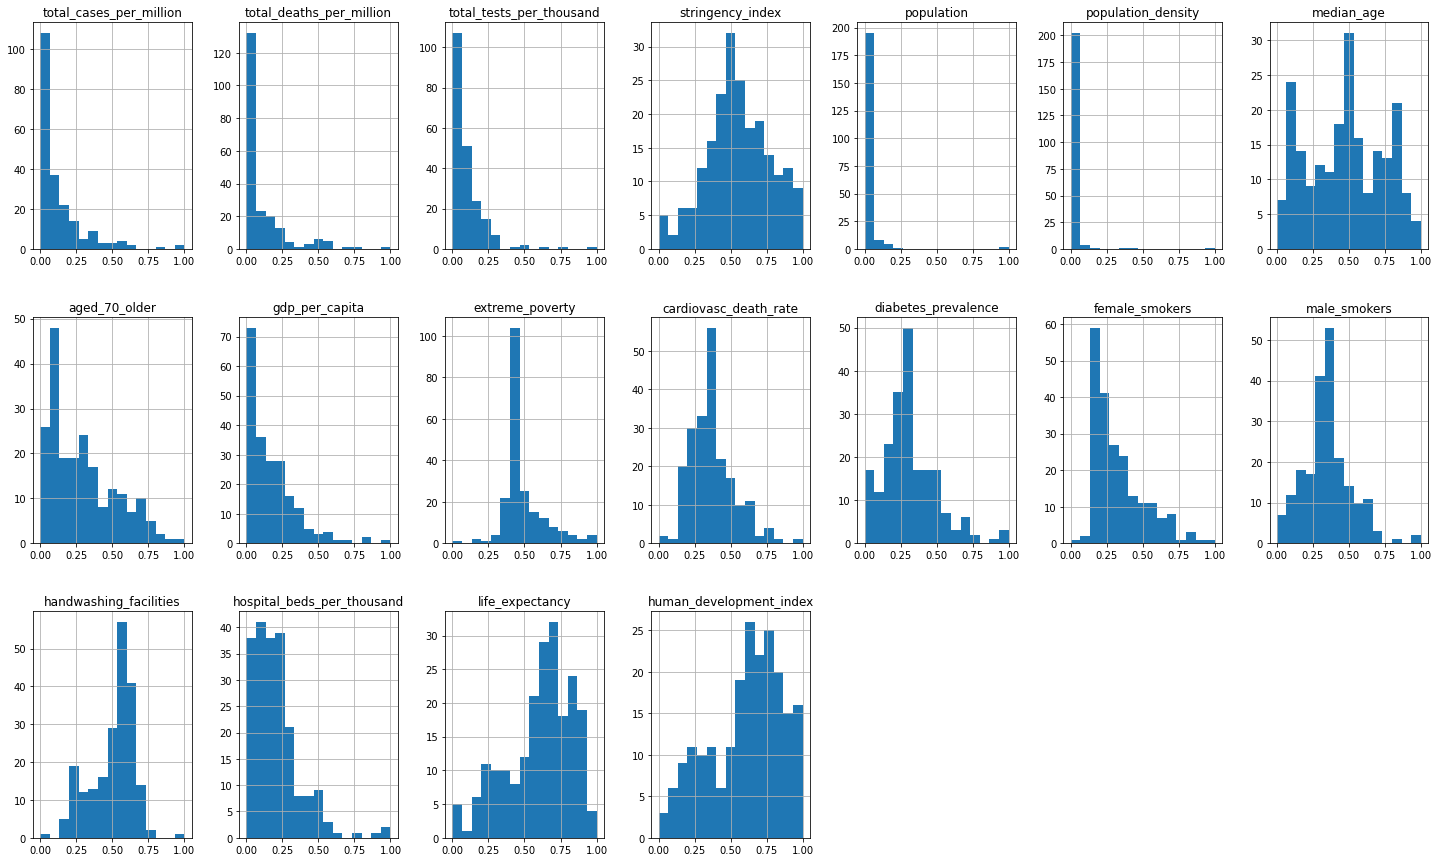

In [11]:
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7))

<AxesSubplot:>

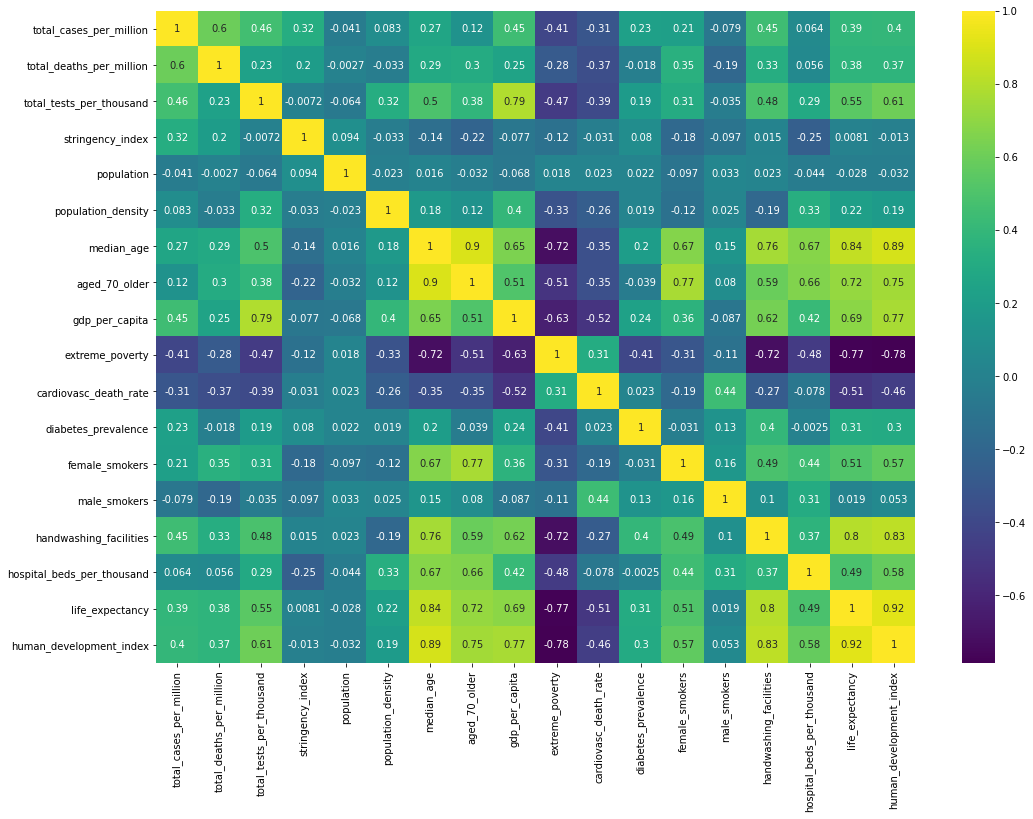

In [12]:
plt.figure(figsize=(17, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [13]:
data.describe()

,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,stringency_index,population,population_density,median_age,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.128069,0.107631,0.099525,0.554210,0.025666,0.018688,0.477526,0.290175,0.169852,0.486196,0.370154,0.316152,0.329292,0.351504,0.502780,0.208402,0.605199,0.606831
std,0.172166,0.159247,0.122622,0.221889,0.099011,0.079362,0.262235,0.223567,0.168437,0.144111,0.151451,0.182020,0.179205,0.160923,0.152149,0.164878,0.224255,0.247802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.012253,0.020338,0.424829,0.000716,0.002145,0.249245,0.091181,0.040770,0.411892,0.266769,0.201833,0.187337,0.261008,0.407475,0.093796,0.485285,0.419706
50%,0.063615,0.042019,0.062562,0.534974,0.004800,0.005013,0.490473,0.236489,0.127674,0.436207,0.357832,0.283415,0.267944,0.343122,0.553692,0.182482,0.650433,0.659147
75%,0.176337,0.145594,0.132965,0.709280,0.018174,0.012963,0.696375,0.451480,0.240655,0.525894,0.445479,0.406348,0.415573,0.427557,0.607769,0.269701,0.766283,0.793738
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data_reweighted = data.copy()

data_reweighted[['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand','stringency_index']] = data_reweighted[['total_cases_per_million', 'total_deaths_per_million', 'total_tests_per_thousand','stringency_index']] * 2



In [15]:
data.to_csv('../data/processed/processed.csv', index=False)
data.to_csv('../data/processed/processed_weighted.csv', index=False)